# **Simple Linear Regression**
<hr>

**Tujuan Instruksional Umum:**
1. Peserta mampu membuat program untuk memberikan prediksi berdasarkan data numerikal (continuous).
2. Peserta mampu mengevaluasi model machine learning berdasarkan evaluation metrics

**Target Pertemuan**: 
1. Peserta mampu membuat prediksi data numerik menggunakan Simple Linear Regression.
2. Peserta mampu mengevaluasi model prediksi regresi menggunakan evaluation metric seperti MSE, RMSE, MAE, Med AE, dan R2 Score.

<hr>

Simple linear regression is an approach for predicting a response using a single feature.

It is assumed that the two variables are linearly related. Hence, we try to find a linear function that predicts the response value(y) as accurately as possible as a function of the feature or independent variable(x).

Linear relationship basically means that when one (or more) independent variables increases (or decreases), the dependent variable increases (or decreases) too:

<img src='f_img.png'>

As you can see, a linear relationship can be positive (independent variable goes up, dependent variable goes up) or negative (independent variable goes up, dependent variable goes down).

**Applications:**

1. **Trend lines**: A trend line represents the variation in some quantitative data with passage of time (like GDP, oil prices, etc.). These trends usually follow a linear relationship. Hence, linear regression can be applied to predict future values. However, this method suffers from a lack of scientific validity in cases where other potential changes can affect the data.

2. **Economics**: Linear regression is the predominant empirical tool in economics. For example, it is used to predict consumption spending, fixed investment spending, inventory investment, purchases of a country’s exports, spending on imports, the demand to hold liquid assets, labor demand, and labor supply.

3. **Finance**: Capital price asset model uses linear regression to analyze and quantify the systematic risks of an investment.

4. **Biology**: Linear regression is used to model causal relationships between parameters in biological systems.

## **Linear Regression Theory**
The term “linearity” in algebra refers to a linear relationship between two or more variables. If we draw this relationship in a two-dimensional space (between two variables), we get a straight line.

Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output). Hence, the name is Linear Regression. If we plot the independent variable (x) on the x-axis and dependent variable (y) on the y-axis, linear regression gives us a straight line that best fits the data points, as shown in the figure below.

We know that the equation of a straight line is basically:

<img src='a_img.png'>

The equation of the above line is :

> **Y= mx + c**

Where **c is the intercept and m is the slope** of the line. So basically, the linear regression algorithm gives us the most optimal value for the intercept and the slope (in two dimensions). The y and x variables remain the same, since they are the data features and cannot be changed. The values that we can control are the intercept(b) and slope(m). There can be multiple straight lines depending upon the values of intercept and slope. Basically what the linear regression algorithm does is it fits multiple lines on the data points and returns the line that results in the least error.

<img src= 'b_img.gif'>

In [23]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sb

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [24]:
dataset = pd.read_csv('melb_data.csv')
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
dataset.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


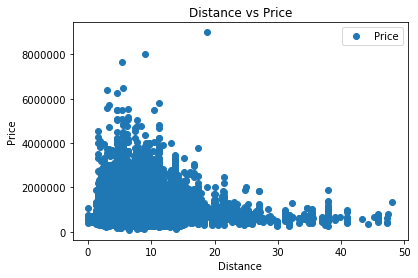

In [5]:
dataset.plot(x='Distance', y='Price', style='o')
plt.title('Distance vs Price')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.show()

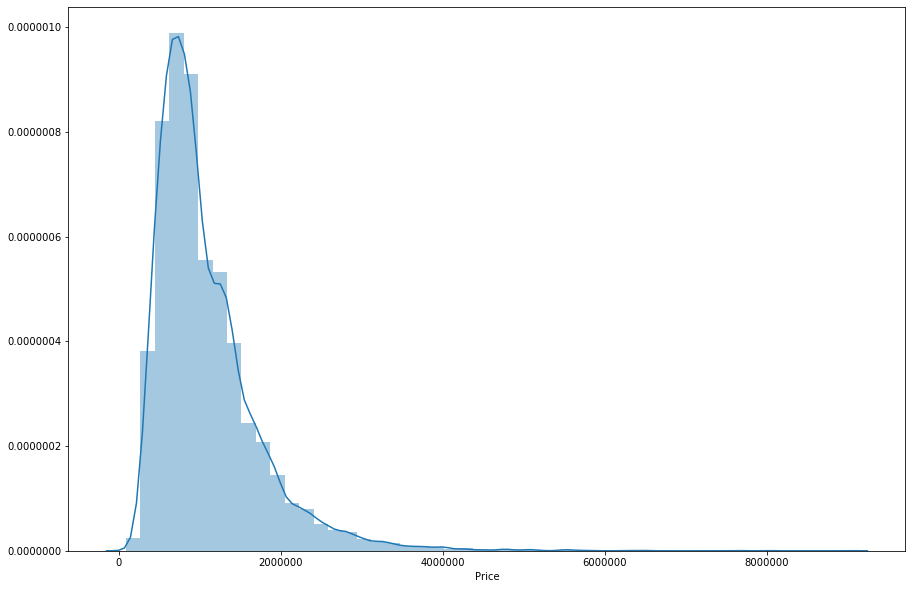

In [6]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sb.distplot(dataset['Price'])

### **Memisahkan feature/variabel independen (x) dengan target/variabel dependen (y)**

In [30]:
X = dataset['Distance'].values.reshape(-1,1)
y = dataset['Price'].values.reshape(-1,1)

### **Memisahkan Data menjadi Data Train dan Data Test**

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### **Training Model dengan Data Train**

In [32]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### **Mencari Nilai Slope & Intercept**

> **Y= mx + c**

* Y = variabel dependen
* X = variabel independen
* m = slope
* c = intercept/contansta

> **HargaRumah = (-17477.41 x Distance) + 1253020.23**

In [41]:
# Harga rumah jika jaraknya (Distance) 40 km
(-17477.41 * 40) + 1253020.23097842

553923.83097842

In [38]:
#For retrieving the slope:
print(regressor.coef_)

#To retrieve the intercept:
print(regressor.intercept_)


[[-17477.41099535]]
[1253020.23097842]


### **Membuat kolom y Predict**

In [42]:
y_pred = regressor.predict(X_test)

In [43]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,2165000.0,1.113201e+06
1,815000.0,1.137669e+06
2,610000.0,1.069507e+06
3,1245000.0,1.174372e+06
4,1160000.0,1.104462e+06
...,...,...
2711,305000.0,1.141165e+06
2712,1412000.0,1.113201e+06
2713,1230000.0,1.064264e+06
2714,1270000.0,1.144660e+06


### **Visualisasi Perbandingan yActual dengan yPredict**

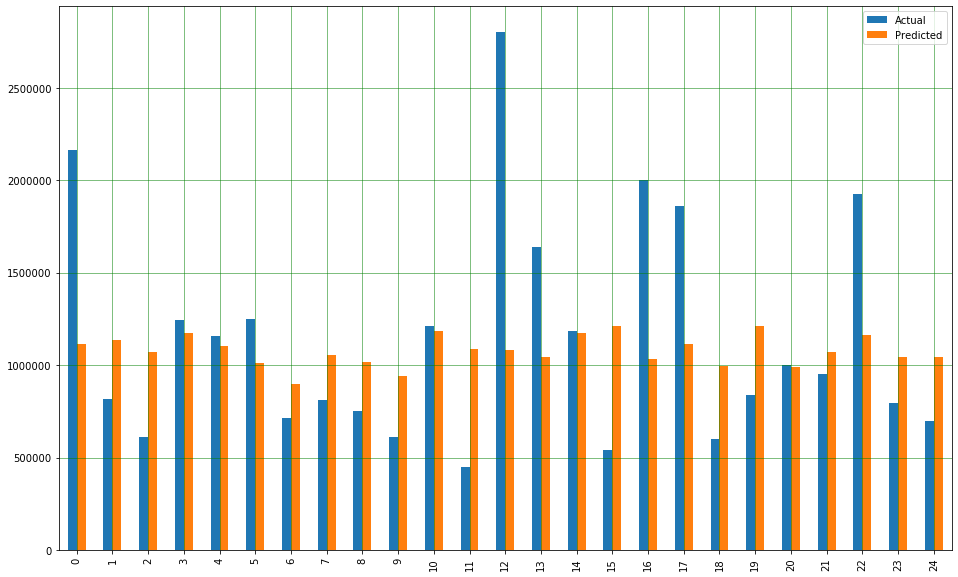

In [17]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# **Evaluation Metrics**

The final step is to evaluate the performance of the algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, three evaluation metrics are commonly used:

### 1.    Mean Absolute Error (MAE)
MAE is the mean of the absolute value of the errors. It is calculated as:

<img src='c_img.png'>

### 2. Mean Squared Error (MSE) 
MSE is the mean of the squared errors and is calculated as:

<img src='d_img.png'>

### 3. Root Mean Squared Error (RMSE) 
RMSE is the square root of the mean of the squared errors:

<img src='e_img.gif'>

Luckily, we don’t have to perform these calculations manually. The Scikit-Learn library comes with pre-built functions that can be used to find out these values for us.

Let’s find the values for these metrics using our test data.

In [20]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Max Error:",round(metrics.max_error(y_test, y_pred), 2))

Mean Absolute Error: 453479.3155352876
Mean Squared Error: 383466291875.1081
Root Mean Squared Error: 619246.5517668291
Max Error: 5199412.0


In [22]:
print("MedAE:",
    round(metrics.median_absolute_error(y_test, y_pred), 2))
print("MSLE",
    round(metrics.mean_squared_log_error(y_test, y_pred), 2))
print("RMSLE:",
    np.sqrt(metrics.mean_squared_log_error(y_test, y_pred)))
print("R2 Score:",
    round(metrics.r2_score(y_test, y_pred), 2))

MedAE: 366714.5
MSLE 0.29
RMSLE: 0.5350870652451307
R2 Score: 0.03


# TAKE HOME EXERCISE
1. Dataset yang digunakan adalah melb_data.csv. X = Distance, Y = Price

2. Buat beberapa percobaan untuk menemukan model SLR terbaik:

3. Urutan percobaan 1 (train 80% test 20%):

    1.a) Distance tidak ada intervensi sama sekali
    
    1.b) Distance = handle missing value
    
    1.c) Distance = langkah (b) + handle outlier
    
    1.d) Distance = langkah (b & c) + scalling
    
4. Urutan percobaan 2 (train 90% test 10%):

    2.a) Distance tidak ada intervensi sama sekali
    
    2.b) Distance = handle missing value
    
    2.c) Distance = langkah (b) + handle outlier
    
    2.d) Distance = langkah (b & c) + scalling    
    
5. Di setiap percobaan tampilkan MAE, MSE, dan RMSE

## **Reference**
* Nagesh Singh Chauhan, "A beginner’s guide to Linear Regression in Python with Scikit-Learn", https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
* Dataset source: https://www.kaggle.com/usaf/world-war-ii
* Adi Bronshtein, "Simple and Multiple Linear Regression in Python", https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9
* GeeksforGeeks, "Linear Regression (Python Implementation)", https://www.geeksforgeeks.org/linear-regression-python-implementation/